In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the pre-split data
train_df = pd.read_csv('csv/pokemon_train.csv')
test_df = pd.read_csv('csv/pokemon_test.csv')

# Prepare features and targets
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height(m)', 'Weight(kg)']
X_train = train_df[features]
y_train_type = train_df['Primary_Type']
y_train_gen = train_df['Generation']

X_test = test_df[features]
y_test_type = test_df['Primary_Type']
y_test_gen = test_df['Generation']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression for Generation prediction
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train_scaled, y_train_gen)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test_gen, lr_predictions)
print(f"Logistic Regression Accuracy for Generation prediction: {lr_accuracy}")
print("\nClassification Report for Generation prediction:")
print(classification_report(y_test_gen, lr_predictions))

# K-NN for Type prediction
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train_type)
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test_type, knn_predictions)
print(f"\nK-NN Accuracy for Type prediction: {knn_accuracy}")
print("\nClassification Report for Type prediction:")
print(classification_report(y_test_type, knn_predictions))

Logistic Regression Accuracy for Generation prediction: 0.2

Classification Report for Generation prediction:
              precision    recall  f1-score   support

         1.0       0.24      0.39      0.30        33
         2.0       0.12      0.06      0.08        18
         3.0       0.15      0.19      0.17        26
         4.0       0.05      0.06      0.06        16
         5.0       0.28      0.46      0.34        35
         6.0       0.00      0.00      0.00        12
         7.0       0.25      0.05      0.08        20
         8.0       0.00      0.00      0.00        17
         9.0       0.17      0.14      0.15        28

    accuracy                           0.20       205
   macro avg       0.14      0.15      0.13       205
weighted avg       0.17      0.20      0.17       205


K-NN Accuracy for Type prediction: 0.18048780487804877

Classification Report for Type prediction:
              precision    recall  f1-score   support

         Bug       0.19      0

/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

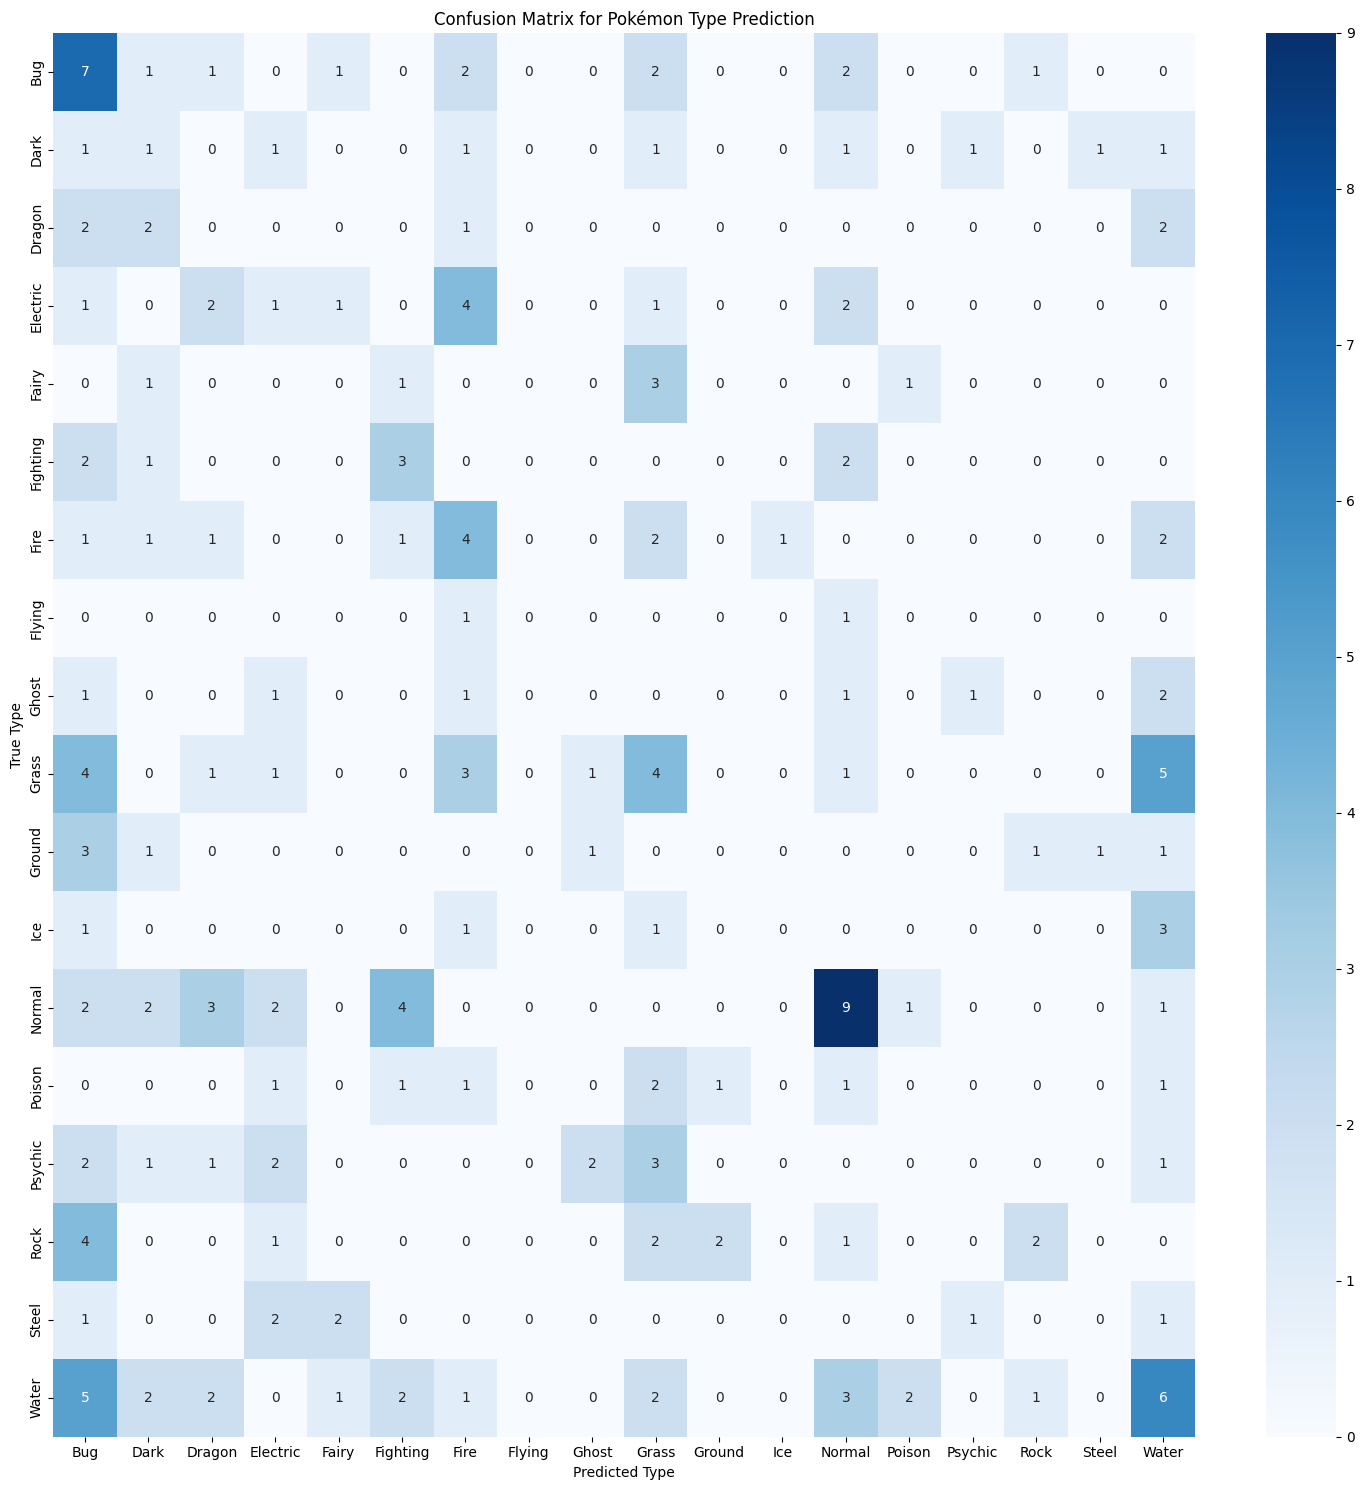

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix for Pokémon Type Prediction')
    plt.ylabel('True Type')
    plt.xlabel('Predicted Type')
    plt.tight_layout()
    plt.show()

# Get predictions on the test set
y_true = y_test_type  # True labels from your test set
y_pred = knn_model.predict(X_test_scaled)  # Predictions on the test set

# Get unique classes (Pokémon types)
classes = np.unique(y_true)

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)

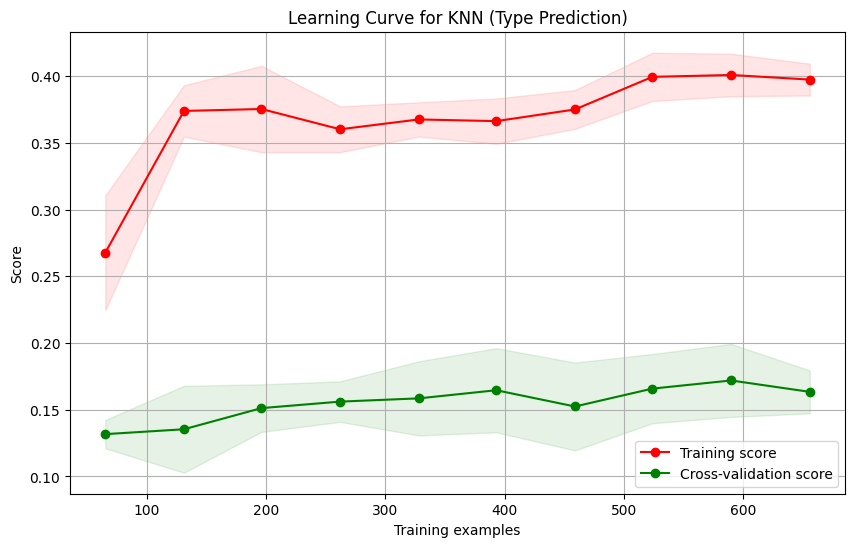

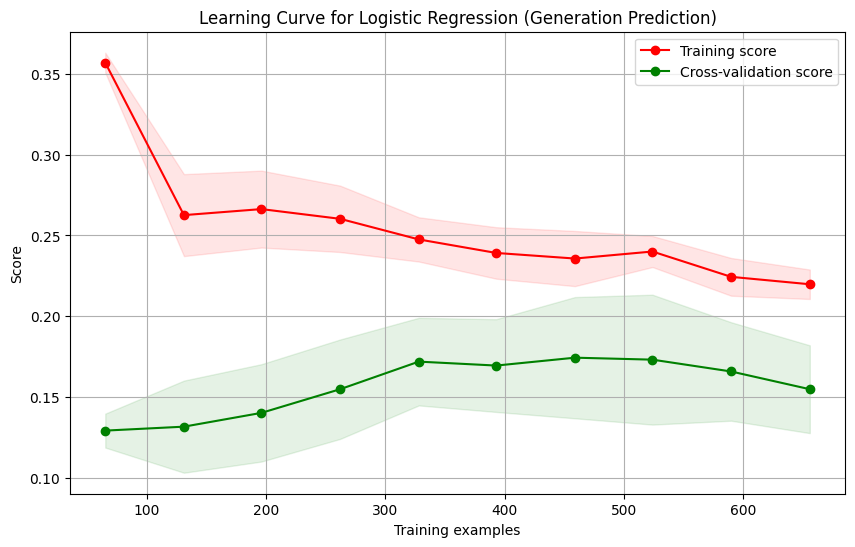

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier # suppress deprecation warning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error

def plot_learning_curve(estimator, X, y, title, scoring):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# For KNN model (Type Prediction)
knn = KNeighborsClassifier(n_neighbors=5)
plot_learning_curve(knn, X_train_scaled, y_train_type, "Learning Curve for KNN (Type Prediction)", 'accuracy')

# For Logistic Regression model (Generation Prediction)
# lr = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
plot_learning_curve(lr_model, X_train_scaled, y_train_gen, "Learning Curve for Logistic Regression (Generation Prediction)", 'accuracy')

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

# Load the entire dataset
df = pd.read_csv('csv/pokemon.csv')

# Prepare features and targets
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height(m)', 'Weight(kg)']
X = df[features]
y_type = df['Primary_Type']
y_gen = df['Generation']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Baseline models
lr_base = LogisticRegression(max_iter=1000)
lr_model = OneVsRestClassifier(lr_base)
knn_baseline = KNeighborsClassifier(n_neighbors=5)

# Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_scaled, y_gen, cv=5)
knn_cv_scores = cross_val_score(knn_baseline, X_scaled, y_type, cv=5)

print("Baseline Cross-validation Results:")
print(f"Logistic Regression CV Accuracy: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")
print(f"K-NN CV Accuracy: {knn_cv_scores.mean():.4f} (+/- {knn_cv_scores.std() * 2:.4f})")

# Hyperparameter tuning
lr_params = {'estimator__C': [0.1, 1, 10], 'estimator__solver': ['lbfgs', 'liblinear']}
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

lr_grid = GridSearchCV(OneVsRestClassifier(LogisticRegression(max_iter=1000)), lr_params, cv=5)
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)

lr_grid.fit(X_scaled, y_gen)
knn_grid.fit(X_scaled, y_type)

# Best models after tuning
lr_best = lr_grid.best_estimator_
knn_best = knn_grid.best_estimator_

# Cross-validation with best models
lr_best_cv_scores = cross_val_score(lr_best, X_scaled, y_gen, cv=5)
knn_best_cv_scores = cross_val_score(knn_best, X_scaled, y_type, cv=5)

print("\nTuned Models Cross-validation Results:")
print(f"Logistic Regression CV Accuracy: {lr_best_cv_scores.mean():.4f} (+/- {lr_best_cv_scores.std() * 2:.4f})")
print(f"K-NN CV Accuracy: {knn_best_cv_scores.mean():.4f} (+/- {knn_best_cv_scores.std() * 2:.4f})")

print("\nBest Parameters:")
print(f"Logistic Regression: {lr_grid.best_params_}")
print(f"K-NN: {knn_grid.best_params_}")

# Compare with baseline implementation
print("\nComparison with Baseline Implementation:")
print(f"Logistic Regression Improvement: {lr_best_cv_scores.mean() - lr_cv_scores.mean():.4f}")
print(f"K-NN Improvement: {knn_best_cv_scores.mean() - knn_cv_scores.mean():.4f}")

Baseline Cross-validation Results:
Logistic Regression CV Accuracy: 0.1795 (+/- 0.0914)
K-NN CV Accuracy: 0.1717 (+/- 0.0514)

Tuned Models Cross-validation Results:
Logistic Regression CV Accuracy: 0.1795 (+/- 0.0914)
K-NN CV Accuracy: 0.2000 (+/- 0.0436)

Best Parameters:
Logistic Regression: {'estimator__C': 1, 'estimator__solver': 'lbfgs'}
K-NN: {'n_neighbors': 7, 'weights': 'distance'}

Comparison with Baseline Implementation:
Logistic Regression Improvement: 0.0000
K-NN Improvement: 0.0283


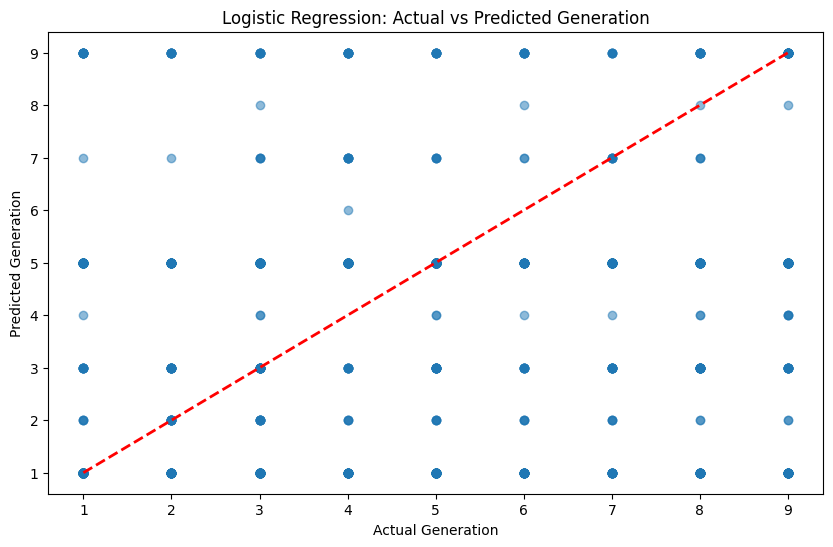

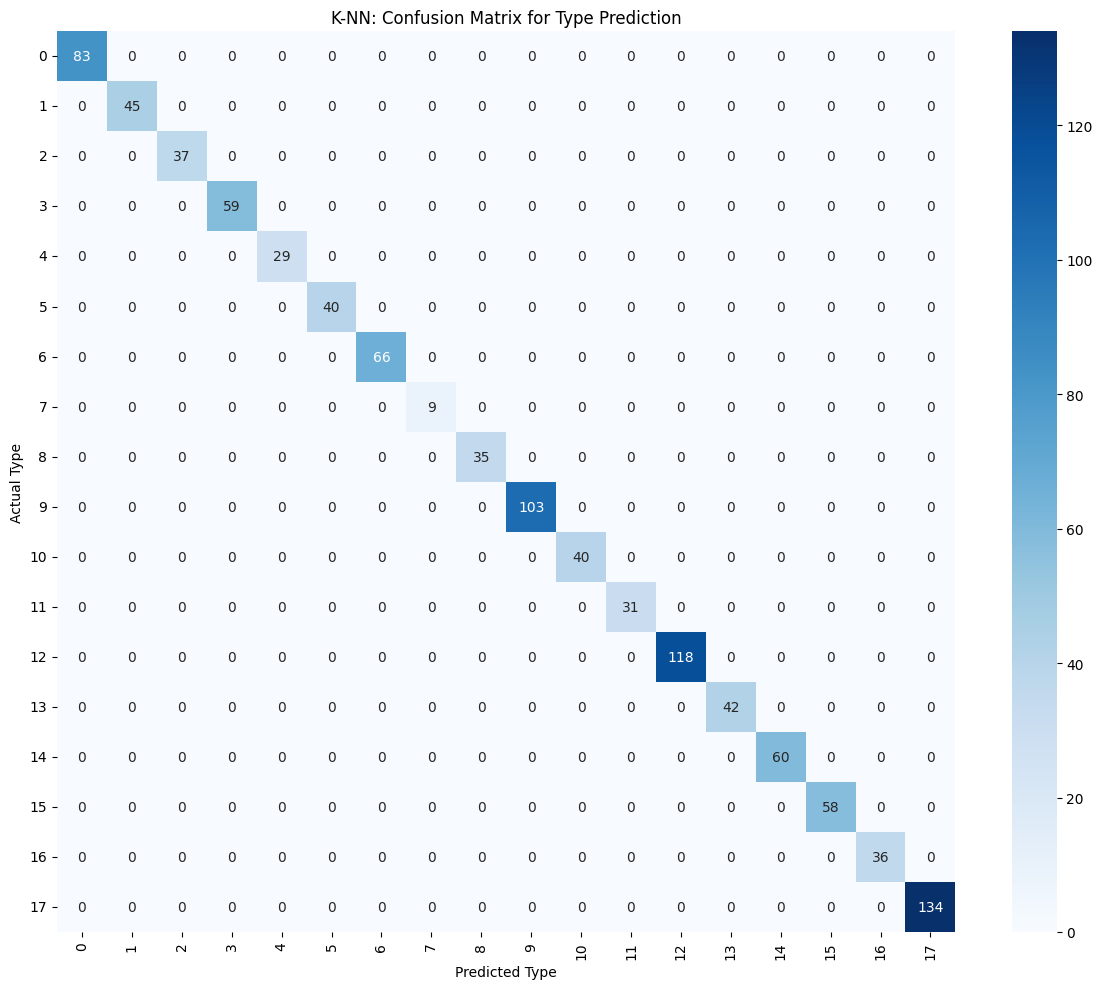

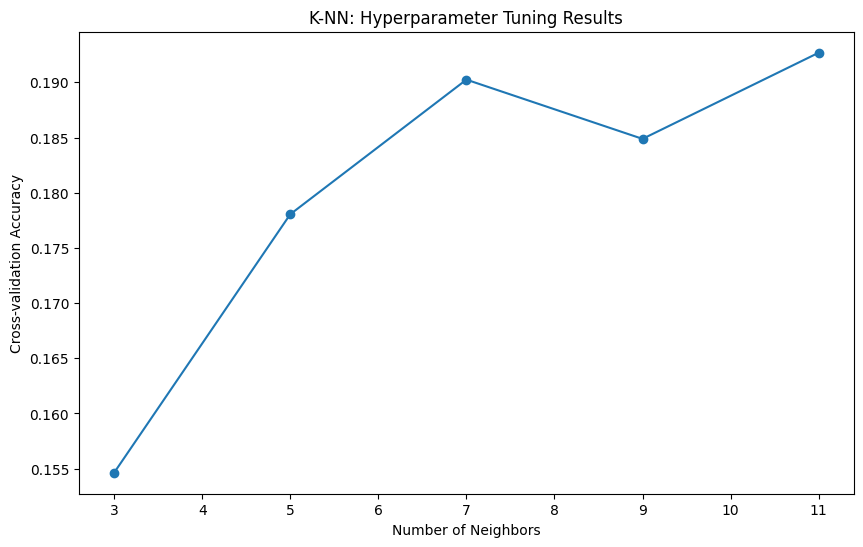

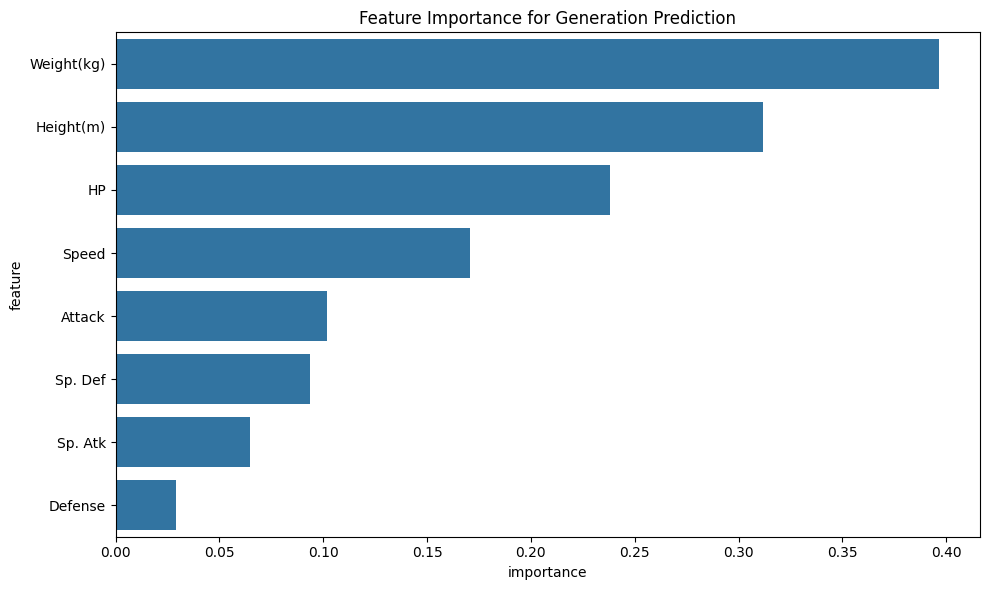

/var/folders/wv/9_zfl0j17p31nyfms_71vgn40000gn/T/ipykernel_3196/2430035815.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lr_best_cv_scores, knn_best_cv_scores], labels=['Logistic Regression', 'K-NN'])


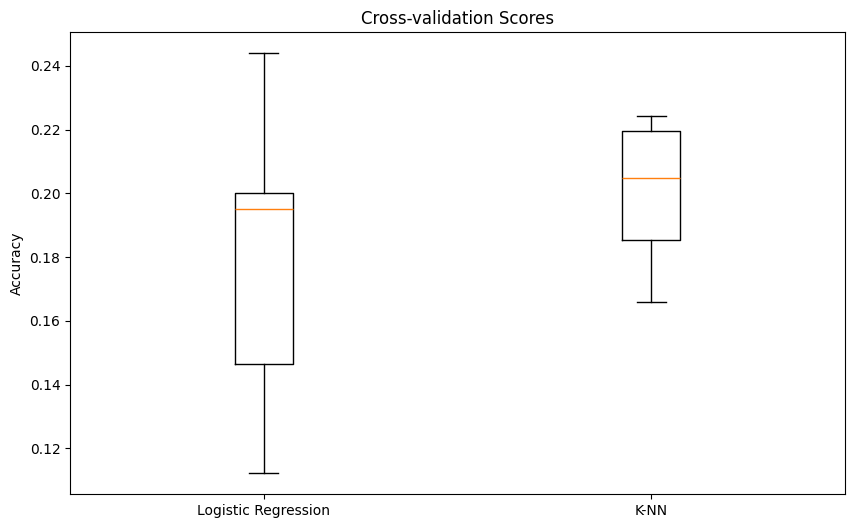

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize Logistic Regression results for Generation prediction
plt.figure(figsize=(10, 6))
y_pred_gen = lr_best.predict(X_scaled)
plt.scatter(y_gen, y_pred_gen, alpha=0.5)
plt.plot([y_gen.min(), y_gen.max()], [y_gen.min(), y_gen.max()], 'r--', lw=2)
plt.xlabel('Actual Generation')
plt.ylabel('Predicted Generation')
plt.title('Logistic Regression: Actual vs Predicted Generation')
plt.show()

# Visualize K-NN hyperparameter tuning results
plt.figure(figsize=(10, 6))
n_neighbors = knn_grid.param_grid['n_neighbors']
mean_scores = []

for n in n_neighbors:
    scores = knn_grid.cv_results_['mean_test_score'][knn_grid.cv_results_['param_n_neighbors'] == n]
    mean_scores.append(scores.mean())

plt.plot(n_neighbors, mean_scores, 'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-validation Accuracy')
plt.title('K-NN: Hyperparameter Tuning Results')
plt.show()

# Visualize feature importance for Logistic Regression (Generation prediction)
lr_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(lr_best.estimators_[0].coef_[0])})
lr_importance = lr_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=lr_importance)
plt.title('Feature Importance for Generation Prediction')
plt.tight_layout()
plt.show()

# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot([lr_best_cv_scores, knn_best_cv_scores], tick_labels=['Logistic Regression', 'K-NN'])
plt.title('Cross-validation Scores')
plt.ylabel('Accuracy')
plt.show()